b'\n    <!DOCTYPE html>\n    <html>\n      <head>\n      <meta name="viewport" content="width=device-width, initial-scale=1">\n      <link rel="preconnect" href="https://googleads.g.doubleclick.net">\n      <link rel="preconnect" href="https://jumbo.zomato.com">\n      <link rel="preconnect" href="https://accounts.google.com">\n      <link rel="preconnect" href="https://securepubads.g.doubleclick.net">\n      <link rel="preconnect" href="https://www.google-analytics.com">\n      <link rel="preconnect" href="https://www.googleadservices.com">\n      <link rel="preconnect" href="https://bat.bing.com">\n      <link rel="preconnect" href="https://8391443.fls.doubleclick.net">\n      <title data-rh="true">Best Food in Chennai | Zomato</title>\n      <meta data-rh="true" charset="utf-8"/><meta data-rh="true" name="robots" content="NOODP,NOYDIR"/><meta data-rh="true" name="description" content="The hunt for the highest-rated restaurants in your Chennai ends here."/><meta data-rh="true" name="
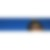
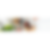
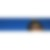
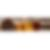
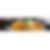
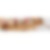
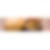
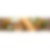
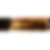
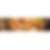
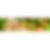
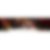
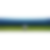
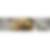
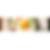
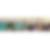
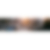
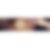
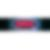
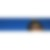
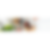
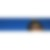
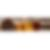
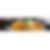
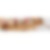
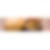
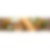
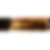
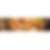
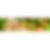
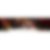
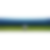
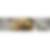
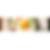
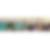
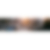
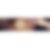
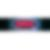

In [1]:
import requests
from bs4 import BeautifulSoup as BS
URL = "https://www.zomato.com/chennai/great-food-no-bull"
headers = {
    'authority': 'www.zomato.com',
'method': 'GET',
'path': '/chennai/dine-out',
'scheme': 'https',
'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
'sec-ch-ua-mobile': '?0',
'sec-ch-ua-platform': '"macOS"',
'sec-fetch-dest': 'document',
'sec-fetch-mode': 'navigate',
'sec-fetch-site': 'same-origin',
'sec-fetch-user': '?1',
'upgrade-insecure-requests': '1',
'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.5060.134 Safari/537.36'
}

page = requests.get(URL, headers=headers)

soup = BS(page.content, "html.parser")

print(page.content)


In [32]:
top_rest = soup.find_all("div",attrs={"class": "sc-laTMn gITREa"})

# print(top_rest)

list_tr = top_rest[0].find_all("div",attrs={"class": "sc-gykZtl cNbqkQ"})
# print(tr.find("div",attrs={"class": "sc-ldQhTJ hlojsD"}).text)
list_rest =[]
for tr in list_tr:
    dataframe ={}
    dataframe["RestaurantName"] = (tr.find("a",attrs={"class": "sc-lljKfs sc-ffCbqV dKlSrU"})).text.replace('\n', ' ')
    attr = tr.find("a",attrs={"class": "sc-lljKfs sc-ffCbqV dKlSrU"})
    dataframe["RestaurantURL"] = attr["href"]
    dataframe["CuisineType"] = (tr.find("div",attrs={"class":"sc-ldQhTJ hlojsD"})).text.replace('\n', ' ')
    list_rest.append(dataframe)
# print(list_rest)
    

South Indian, North Indian
[{'RestaurantName': 'Haagen Dazs', 'RestaurantURL': 'https://www.zomato.com/chennai/haagen-dazs-nungambakkam?zrp_bid=0&zrp_pid=14', 'CuisineType': 'Ice Cream,\xa0Desserts,\xa0Beverages'}, {'RestaurantName': 'MKC - Madras Kitchen Company', 'RestaurantURL': 'https://www.zomato.com/chennai/mkc-madras-kitchen-company-velachery?zrp_bid=0&zrp_pid=14', 'CuisineType': 'Cafe,\xa0Asian,\xa0North Indian,\xa0Desserts,\xa0Beverages'}, {'RestaurantName': 'Southern Spice - Taj Coromandel', 'RestaurantURL': 'https://www.zomato.com/chennai/southern-spice-taj-coromandel-nungambakkam?zrp_bid=0&zrp_pid=14', 'CuisineType': 'South Indian'}, {'RestaurantName': 'SpiceKlub', 'RestaurantURL': 'https://www.zomato.com/chennai/spiceklub-nungambakkam?zrp_bid=0&zrp_pid=14', 'CuisineType': 'North Indian,\xa0Desserts,\xa0Beverages'}, {'RestaurantName': 'The Sandwich Shop', 'RestaurantURL': 'https://www.zomato.com/chennai/the-sandwich-shop-west-mambalam?zrp_bid=0&zrp_pid=14', 'CuisineType': '

In [33]:
print(dataframe)

{'RestaurantName': 'Royal Indianaa - The Accord Metropolitan', 'RestaurantURL': 'https://www.zomato.com/chennai/royal-indianaa-the-accord-metropolitan-1-t-nagar?zrp_bid=0&zrp_pid=14', 'CuisineType': 'South Indian,\xa0North Indian'}


In [34]:
import pandas
df = pandas.DataFrame(list_rest)
df.to_csv("zomato_res.csv",index=False)

In [36]:
df

,RestaurantName,RestaurantURL,CuisineType
0,Haagen Dazs,https://www.zomato.com/chennai/haagen-dazs-nun...,"Ice Cream, Desserts, Beverages"
1,MKC - Madras Kitchen Company,https://www.zomato.com/chennai/mkc-madras-kitc...,"Cafe, Asian, North Indian, Desserts, Beverages"
2,Southern Spice - Taj Coromandel,https://www.zomato.com/chennai/southern-spice-...,South Indian
3,SpiceKlub,https://www.zomato.com/chennai/spiceklub-nunga...,"North Indian, Desserts, Beverages"
4,The Sandwich Shop,https://www.zomato.com/chennai/the-sandwich-sh...,"Sandwich, Fast Food, Beverages, Shake, Sichuan"
...,...,...,...
70,Gossip Fusion Bistro,https://www.zomato.com/chennai/gossip-fusion-b...,"Italian, Salad, Seafood, Kerala, North Indian,..."
71,Murugan Idli Shop,https://www.zomato.com/chennai/murugan-idli-sh...,"South Indian, Desserts, Beverages"
72,BurgerMan,https://www.zomato.com/chennai/burgerman-besan...,"Burger, Fast Food, Salad, Desserts, Beverages"
73,The Brew Room,https://www.zomato.com/chennai/the-brew-room-a...,"Cafe, Continental, Italian, Desserts"
